<a href="https://colab.research.google.com/github/JuanDCastanoL/Procesamiento_de_Senales/blob/main/01_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Punto 1
Crear una señal muesteada con frecuencias diferentes y mostrar su espectro de potencia

In [ ]:
from ipywidgets import interactive
import numpy as np
from scipy.fft import fft, fftfreq, fftshift
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec



def fft_frec(f):
  T = 1 / f
  t = np.arange(0, 1, T)

  x1 =         np.sin(   6  *  2*np.pi*t)
  x2 =   0.5*  np.sin(  12  *  2*np.pi*t)
  x3 =  -0.3*  np.cos(  18  *  2*np.pi*t+0.5)
  x4 =   0.15
  signal = x1 + x2 + x3 + x4

  # FFT
  N = len(signal)
  yf = fft(signal)           # Transformada de Fourier
  xf = fftfreq(N, T)         # Frecuencias asociadas

  yf_shifted = fftshift(yf)  # Espectro centrado
  xf_shifted = fftshift(xf)  # Frecuencias centradas

  return xf_shifted, np.abs(yf_shifted), signal, t



def fft_frecuencias_muestreo_variable(f1,f2):

  x1, y1, s1, t1 = fft_frec(f1)
  x2, y2, s2, t2 = fft_frec(f2)

  # Graficar
  fig = plt.figure(figsize=(10, 4))
  gs = GridSpec(2, 3, figure=fig)  # Dividir en una cuadrícula de 2x3

  ax1 = fig.add_subplot(gs[:, 0:2])  # Ocupa las filas completas y dos columnas
  ax1.set_title("Señales Muestreadas")
  ax1.set_xlabel("Tiempo (Seg)")
  ax1.set_ylabel("Amplitud")
  ax1.plot(t2,s2,color='#33c208', linewidth=0.9)
  ax1.scatter(t2,s2,c='#33c208', s=6)
  ax1.plot(t1,s1,color='red', linewidth=1)
  ax1.scatter(t1,s1,c='red', s=7)
  ax1.grid()

  ax2 = fig.add_subplot(gs[0, 2])  # Primera fila, tercera columna
  ax2.vlines(x1, 0, y1, color='blue', alpha=0.7, linewidth=1.5)
  ax2.set_title(f"FFT {f1} Hz")
  ax2.set_xlabel("Frecuencia (Hz)")
  ax2.set_ylabel("Amplitud")
  ax2.grid()

  ax3 = fig.add_subplot(gs[1, 2])  # Segunda fila, tercera columna
  ax3.vlines(x2, 0, y2, color='blue', alpha=0.7, linewidth=1.5)
  ax3.set_title(f"FFT {f2} Hz")
  ax3.set_xlabel("Frecuencia (Hz)")
  ax3.set_ylabel("Amplitud")
  ax3.grid()

  plt.tight_layout()
  plt.show()


interactive_plot = interactive(fft_frecuencias_muestreo_variable, f1=(1,150), f2=(1,150))
interactive_plot.children[0].value = 40
interactive_plot.children[1].value = 150
interactive_plot

interactive(children=(IntSlider(value=40, description='f1', max=150, min=1), IntSlider(value=150, description=…

# Punto 2

Parte 1:
- Crear una señal con 10 armonicos y ruido banco gauseano de amplitud 0,3.
- Graficar el espectro de potencia.
- Devolver al dominio del tiempo

Parte 2:

- Aplicarle filtrado digital a la señal original para solo dejar una frecuencia superior a una inferior

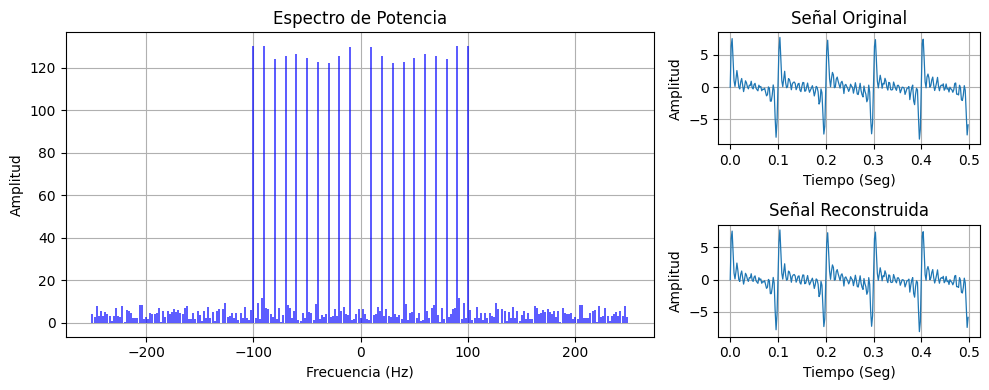

In [ ]:
import numpy as np
from scipy.fft import fft, fftfreq, fftshift, ifftshift, ifft
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec



# Parametros de la Señal
f = 500
T = 1 / f
t = np.arange(0, 0.5, T)

media = 0
desviacion_estandar = 1



# Creando la Señal
s0 = 0.3* np.random.normal(media, desviacion_estandar, len(t))
s1 =   np.sin(  10  *  2*np.pi*t)
s2 =   np.sin(  20  *  2*np.pi*t)
s3 =   np.sin(  30  *  2*np.pi*t)
s4 =   np.sin(  40  *  2*np.pi*t)
s5 =   np.sin(  50  *  2*np.pi*t)
s6 =   np.sin(  60  *  2*np.pi*t)
s7 =   np.sin(  70  *  2*np.pi*t)
s8 =   np.sin(  80  *  2*np.pi*t)
s9 =   np.sin(  90  *  2*np.pi*t)
s10 =  np.sin( 100  *  2*np.pi*t)

signal = s0 + s1 + s2 + s3 + s4 + s5 + s6 + s7 + s8 + s9 + s10



# Calculos de Fourier
N = len(signal)
yf = fft(signal)                                    # Transformada de Fourier
xf = fftfreq(N, T)                                  # Frecuencias asociadas

yf_shifted = fftshift(yf)                           # Espectro centrado
xf_shifted = fftshift(xf)                           # Frecuencias centradas

frec_descentrada = np.fft.ifftshift(yf_shifted)     # Decentrando las frecuencias
señal_reconstruida = np.fft.ifft(frec_descentrada)  # Transformada inversa fourier



# Graficar
fig = plt.figure(figsize=(10, 4))
gs = GridSpec(2, 3, figure=fig)

ax1 = fig.add_subplot(gs[:, 0:2])
ax1.set_title("Espectro de Potencia")
ax1.vlines(xf_shifted, 0, np.abs(yf_shifted), color='blue', alpha=0.7, linewidth=1.3)
ax1.set_xlabel("Frecuencia (Hz)")
ax1.set_ylabel("Amplitud")
ax1.grid()

ax2 = fig.add_subplot(gs[0, 2])
ax2.set_title("Señal Original")
ax2.plot(t, signal, linewidth=0.9)
ax2.set_xlabel("Tiempo (Seg)")
ax2.set_ylabel("Amplitud")
ax2.grid()

ax3 = fig.add_subplot(gs[1, 2])
ax3.plot(t, señal_reconstruida.real, linewidth=0.9)
ax3.set_title("Señal Reconstruida")
ax3.set_xlabel("Tiempo (Seg)")
ax3.set_ylabel("Amplitud")
ax3.grid()

plt.tight_layout()
plt.show()

In [ ]:
from ipywidgets import interactive, fixed
import numpy as np
from scipy.fft import fft, fftfreq, fftshift, ifftshift, ifft
import matplotlib.pyplot as plt


def filtro_digital(xf_shifted, yf_shifted, f_inf = (0, 250), f_sup= (0, 250)):

  if f_inf > f_sup:
    f_inf, f_sup = 0, 0

  # Creación del Filtro
  filtro = np.where((np.abs(xf_shifted) < f_sup ) & (np.abs(xf_shifted) > f_inf), 1, 0)

  # Filtrando en Frecuencias
  frec_filtrada = filtro * yf_shifted

  # Aplicando Transformada Inversa
  frec_descentrada = np.fft.ifftshift(frec_filtrada)
  señal_reconstruida = np.fft.ifft(frec_descentrada)


  # Graficar
  fig, axes = plt.subplots(1, 2, figsize=(10, 4))

  axes[0].vlines(xf_shifted, 0, np.abs(frec_filtrada).real, alpha=0.9, linewidth=1.3)
  axes[0].set_title("Espectro de Potencia de la Señal Filtrada")
  axes[0].set_xlabel("Frecuencias (Hz)")
  axes[0].set_ylabel("Amplitud")
  axes[0].grid(True)

  axes[1].plot(t, señal_reconstruida.real)
  axes[1].set_title("Señal Reconstruida")
  axes[1].set_xlabel("Tiempo (Seg)")
  axes[1].set_ylabel("Amplitud")
  axes[1].grid(True)

  plt.tight_layout()
  plt.show()


interactive_plot = interactive(filtro_digital, xf_shifted=fixed(xf_shifted), yf_shifted=fixed(yf_shifted), f1=(1,150), f2=(1,150))
interactive_plot.children[0].value = 15
interactive_plot.children[1].value = 75
interactive_plot

interactive(children=(IntSlider(value=15, description='f_inf', max=250), IntSlider(value=75, description='f_su…

#Punto 3

Crear una señal con frecuencias entre 1 y 500 Hz, graficar en el tiempo y en la frecuencia.

Crear un ecualizador de 5 bandas donde se pueda variar la ganancia de cada banda, graficar en el tiempo y en la frecuencia.

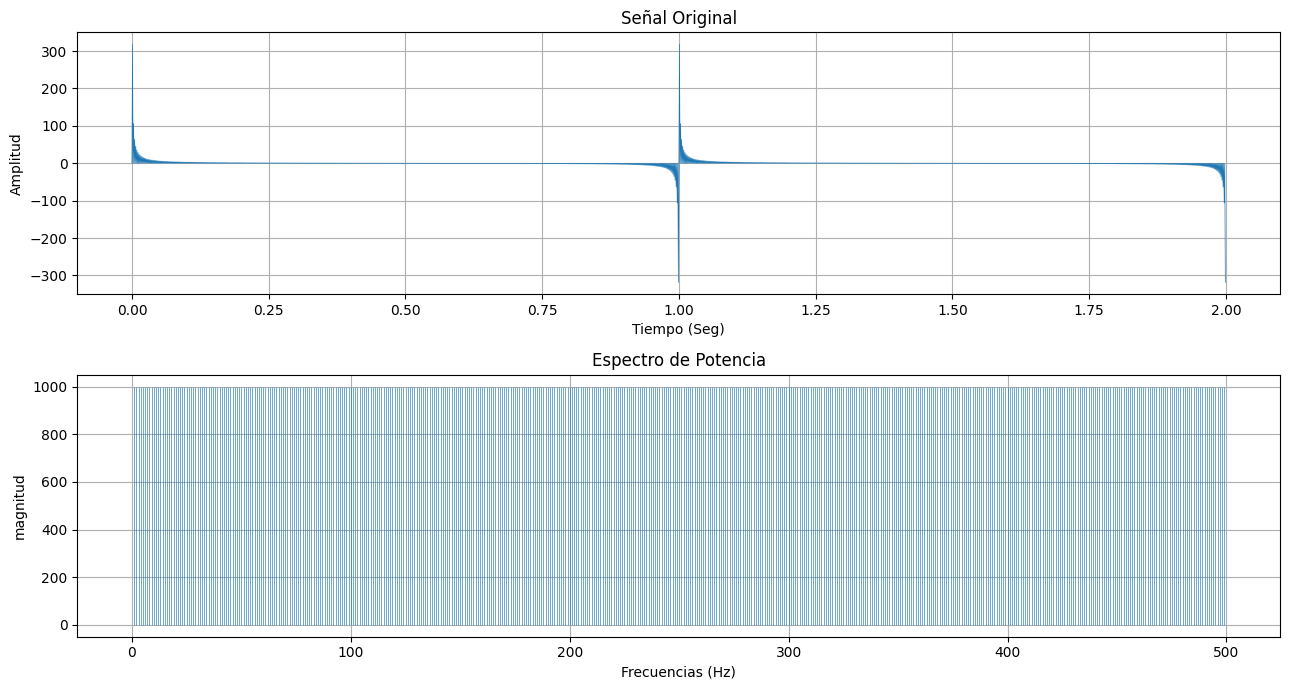

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift
from ipywidgets import interactive


# Señal Original

f = 1000
T = 1/f
t = np.arange(0,2,T)

signal = np.zeros(len(t))
for i in range(500):
  signal += np.sin(2*np.pi*(i+1)*t)

# Espectro Original

N = len(signal)
spectrum_f = fftshift(fft(signal))
frequencies_f = fftshift(fftfreq(N, T))

fig, axes = plt.subplots(2, 1, figsize=(13,7))

axes[0].plot(t, signal, linewidth=0.5)
axes[0].set_title("Señal Original")
axes[0].set_xlabel("Tiempo (Seg)")
axes[0].set_ylabel("Amplitud")
axes[0].grid(True)

axes[1].vlines(frequencies_f[N//2:], 0, np.abs(spectrum_f[N//2:]), linewidth=0.5, alpha = 0.9)
axes[1].set_title("Espectro de Potencia")
axes[1].set_ylabel("magnitud")
axes[1].set_xlabel("Frecuencias (Hz)")
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [4]:
from ipywidgets import interactive, fixed
import numpy as np
from scipy.fft import fft, fftfreq, fftshift, ifftshift, ifft
import matplotlib.pyplot as plt


def ecualizador(dB1, dB2, dB3, dB4, dB5):

  gains_db = [dB1, dB2, dB3, dB4, dB5]
  gains = [10**(gain/10) for gain in gains_db]

  separacion_espectro = (len(spectrum_f) // 2) // 5
  efecto = np.sin(np.linspace(0, np.pi, separacion_espectro))

  medio_espectro = len(spectrum_f) // 2
  espectro_segmentado = [spectrum_f[medio_espectro + i * separacion_espectro : medio_espectro + (i + 1) * separacion_espectro]
                        for i in range(5)]

  espectro_segmentado = [part * (gain - 1) * efecto + part if gain != 1 else part
                        for part, gain in zip(espectro_segmentado, gains)]

  espectro_alterado = np.concatenate(espectro_segmentado)
  espectro_alterado = np.concatenate((espectro_alterado[::-1],espectro_alterado))

  frec_descentrada = np.fft.ifftshift(espectro_alterado)
  señal_reconstruida = np.fft.ifft(frec_descentrada)

  fig, axes = plt.subplots(1, 2, figsize=(13,5))

  axes[0].plot( señal_reconstruida, linewidth=0.5)
  axes[0].set_title("Señal Original")
  axes[0].set_xlabel("Tiempo (Seg)")
  axes[0].set_ylabel("Amplitud")
  axes[0].grid(True)

  axes[1].vlines(frequencies_f[N//2:], 0, np.abs(espectro_alterado[N//2:]), linewidth=0.5, alpha = 0.9)
  axes[1].set_title("Espectro de Potencia")
  axes[1].set_ylabel("Magnitud")
  axes[1].set_xlabel("Frecuencias (Hz)")
  axes[1].grid(True)

  plt.tight_layout()
  plt.show()



interactive_plot = interactive(ecualizador, dB1 = (-10, 10), dB2 = (-10, 10), dB3 = (-10, 10), dB4 = (-10, 10), dB5 = (-10, 10))
interactive_plot.children[0].value = -3
interactive_plot.children[1].value = 0
interactive_plot.children[2].value = 0
interactive_plot.children[3].value = 2
interactive_plot.children[4].value = 3
interactive_plot

interactive(children=(IntSlider(value=-3, description='dB1', max=10, min=-10), IntSlider(value=0, description=…